# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [TEX Spray Chart](#TEX-Spray-Chart)
    - [NYY Home Field Spray Chart](#NYY-Spray-Chart)
- [Batted Ball Profiles](#Batted-Ball-Profiles)
    - [Batted Ball Profile - LA](#Batted-Ball-Profile---LA)
    - [Batted Ball Profile - EV](#Batted-Ball-Profile---EV)
    - [Quality Contact by LA & EV](#Quality-Contact-by-Launch-Angle-&-Exit-Velocity)
    - [ISO Value by LA & EV](#ISO-Value-by-Launch-Angle-&-Exit-Velocity)
    - [BABIP Value by LA & EV](#BABIP-Value-by-Launch-Angle-&-Exit-Velocity)
    - [wOBA Value by LA & EV](#wOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [xwOBA Value by LA & EV](#xwOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [xBA by LA & EV](#xBA-by-Launch-Angle-&-Exit-Velocity)
    - [Home Runs by LA and EV](#Home-Runs-by-Launch-Angle-&-Exit-Velocity)
    - [xwOBA Against EV](#xwOBA-Against-EV)
    - [xwOBA Value of a Hit Against Its EV](#xwOBA-Value-of-a-Hit-Against-Its-Exit-Velocity)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Counts Breakdown](#Counts-Breakdown)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Heatmaps](#Heatmaps)
    - [In-Zone Take Heatmaps - All Pitches](#In-Zone-Take-Heatmaps---All-Pitches)
    - [Out-of-Zone Chase Heatmaps - All Pitches](#Out-of-Zone-Chase-Heatmaps---All-Pitches)
    - [In-Zone Take Heatmaps vs. RHP - by Pitch Type](#In-Zone-Take-Heatmaps-vs.-RHP---by-Pitch-Type)
    - [In-Zone Take Heatmaps vs. LHP - by Pitch Type](#In-Zone-Take-Heatmaps-vs.-LHP---by-Pitch-Type)
    - [Out-of-Zone Chase Heatmaps vs. RHP- by Pitch Type](#Out-of-Zone-Chase-Heatmaps-vs.-RHP---by-Pitch-Type)
    - [Out-of-Zone Chase Heatmaps vs. LHP - by Pitch Type](#Out-of-Zone-Chase-Heatmaps-vs.-LHP---by-Pitch-Type)
    - [4-Seam Heatmaps](#4-Seam-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [1]:
from pybaseball import spraychart
from pybaseball.plotting import plot_bb_profile
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
gallo = pd.read_csv('../data/joey-gallo.csv')
gallo.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(gallo.shape)
gallo.head(2)

(2612, 93)


,pitch_type,game_date,player_name,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,type,hit_location,bb_type,events,description,des,balls,strikes,pitch_count,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,stand,p_throws,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,home_team,away_team,if_fielding_alignment,of_fielding_alignment,game_pk,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
0,CH,2021-10-03,"Gallo, Joey",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,1.0,0.0,0.0,NaN,B,NaN,NaN,walk,ball,Joey Gallo walks.,3,2,3-2,13.0,0,0,0,0,0,0,88.2,1728.0,238.0,-1.25,15.00,10.44,-1.68,6.43,88.1,6.5,54.00,0.22,-0.22,0.85,NaN,NaN,NaN,0,5,Bot,572287,6.170261,-127.963976,-9.239343,-15.024134,27.411927,-20.824096,3.43,1.68,L,R,88.2,1728.0,238.0,-1.25,15.00,10.44,-1.68,6.43,88.1,6.5,54.00,0.22,-0.22,0.85,608336,608379,NYY,TB,Infield shift,4th outfielder,632239,34,6,Changeup,0,0,0,0,0.047,0.329,2021
1,CH,2021-10-03,"Gallo, Joey",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,ball,Joey Gallo walks.,2,2,2-2,13.0,0,0,0,0,0,0,87.6,1712.0,244.0,-1.46,17.52,5.88,-1.62,6.39,87.2,6.4,54.08,1.50,-1.50,0.81,NaN,NaN,NaN,0,5,Bot,572287,3.321954,-127.264439,-8.279582,-16.517043,29.255519,-25.181799,3.53,1.68,L,R,87.6,1712.0,244.0,-1.46,17.52,5.88,-1.62,6.39,87.2,6.4,54.08,1.50,-1.50,0.81,608336,608379,NYY,TB,Infield shift,4th outfielder,632239,34,5,Changeup,0,0,0,0,0.000,0.101,2021


In [3]:
gallo.groupby(['pitch_type'], sort = False).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,81.341250,13.712500,134.050000,137.587083,131.127292,0.266875,0.316979,0.279293,1.000000,0.090909,0.151515,3.000000,3.675000,1.089385,0.949721,10.195531,0.544693,0.187151,0.030726,0.050279,0.100559,0.106145,85.458939,1672.176966,214.794944,-0.747821,8.973855,6.648603,-1.180391,5.854162,84.979050,6.315730,54.184469,0.475028,-0.475028,1.968799,601995.789474,612015.575758,629368.216216,1.011173,4.438547,587953.240223,3.219056,-124.279635,-3.974847,-8.567432,24.804322,-25.821722,3.541480,1.651872,85.458939,1672.176966,214.794944,-0.747821,8.973855,6.648603,-1.180391,5.854162,84.979050,6.315730,54.184469,0.475028,-0.475028,1.968799,608336.0,605259.734637,633453.050279,33.393855,3.097765,1.938547,1.779330,1.787709,1.949721,0.000659,-0.000874,2021.0
FF,87.280995,34.466063,208.318386,137.873068,104.310795,0.387568,0.588818,0.414039,0.995074,0.088670,0.290640,3.840909,4.197183,1.101042,0.839583,7.933333,0.554167,0.140625,0.062500,0.062500,0.128125,0.023958,94.005729,2268.400209,193.514107,-0.237542,2.850500,15.860875,-0.728083,5.904177,93.709063,6.333124,54.167948,0.225531,-0.225531,2.907396,624799.458824,611421.968254,615863.226994,1.052083,4.746875,590832.607292,1.858036,-136.680190,-4.977955,-3.491976,30.110987,-14.684522,3.559958,1.663563,94.005729,2268.400209,193.514107,-0.237542,2.850500,15.860875,-0.728083,5.904177,93.709063,6.333124,54.167948,0.225531,-0.225531,2.907396,608336.0,605942.593750,633355.969792,36.375000,3.018750,2.275000,1.979167,2.000000,2.292708,0.000116,0.008573,2021.0
CU,81.328947,9.789474,135.000000,150.913636,114.047273,0.391455,0.476591,0.254444,0.977778,0.088889,0.155556,3.454545,4.105263,0.830918,0.859903,9.753623,0.521739,0.106280,0.091787,0.077295,0.193237,0.057971,78.300966,2520.632850,139.951691,0.065894,-0.790725,-9.690435,-0.216184,5.956135,77.944928,6.243478,54.255266,0.271498,-0.271498,1.842319,617446.750000,612921.472222,609806.739130,1.183575,4.096618,591065.975845,-0.178381,-113.920237,-0.485048,0.939882,22.846253,-39.247343,3.493720,1.623527,78.300966,2520.632850,139.951691,0.065894,-0.790725,-9.690435,-0.216184,5.956135,77.944928,6.243478,54.255266,0.271498,-0.271498,1.842319,608336.0,594907.352657,633534.256039,31.560386,2.768116,2.072464,1.531401,1.550725,2.072464,-0.001599,-0.004831,2021.0
SL,81.153659,17.329268,150.857143,133.124651,120.403721,0.353837,0.456558,0.334513,1.000000,0.115044,0.168142,3.465116,3.632184,1.013333,0.957778,9.937778,0.577778,0.173333,0.077778,0.046667,0.166667,0.102222,84.436222,2442.029018,196.638393,-0.127844,1.534133,1.014400,0.453511,5.731933,83.987333,6.197545,54.302533,0.278689,-0.278689,1.890378,629886.645161,608252.990000,616552.356322,1.066667,5.331111,597147.346667,-1.429088,-122.881711,-2.788172,-0.943758,23.930950,-30.879454,3.536422,1.644000,84.436222,2442.029018,196.638393,-0.127844,1.534133,1.014400,0.453511,5.731933,83.987333,6.197545,54.302533,0.278689,-0.278689,1.890378,608336.0,606173.637778,633489.373333,41.531111,3.068889,2.471111,2.188889,2.195556,2.491111,0.003922,0.002211,2021.0
FC,82.475000

In [4]:
counts = gallo[['is_strike', 'in_zone_take', 'out_of_zone_chase', 'zone', 'launch_speed', 'launch_angle', 
                'hit_distance_sc', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 
                'pitch_count', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle']]

In [5]:
r_gallo = gallo.loc[gallo['p_throws'] == 'R']
l_gallo = gallo.loc[gallo['p_throws'] == 'L']
# all pitches
ff = gallo.loc[gallo['pitch_type'] == 'FF']
sl = gallo.loc[gallo['pitch_type'] == 'SL']
ch = gallo.loc[gallo['pitch_type'] == 'CH']
si = gallo.loc[gallo['pitch_type'] == 'SI']
cu = gallo.loc[gallo['pitch_type'] == 'CU']
fc = gallo.loc[gallo['pitch_type'] == 'FC']
fs = gallo.loc[gallo['pitch_type'] == 'FS']
kc = gallo.loc[gallo['pitch_type'] == 'KC']
cs = gallo.loc[gallo['pitch_type'] == 'CS']
# vs RHP
r_ff = gallo.loc[(gallo['pitch_type'] == 'FF') & (gallo['p_throws'] == 'R')]
r_sl = gallo.loc[(gallo['pitch_type'] == 'SL') & (gallo['p_throws'] == 'R')]
r_ch = gallo.loc[(gallo['pitch_type'] == 'CH') & (gallo['p_throws'] == 'R')]
r_si = gallo.loc[(gallo['pitch_type'] == 'SI') & (gallo['p_throws'] == 'R')]
r_cu = gallo.loc[(gallo['pitch_type'] == 'CU') & (gallo['p_throws'] == 'R')]
r_fc = gallo.loc[(gallo['pitch_type'] == 'FC') & (gallo['p_throws'] == 'R')]
r_fs = gallo.loc[(gallo['pitch_type'] == 'FS') & (gallo['p_throws'] == 'R')]
r_kc = gallo.loc[(gallo['pitch_type'] == 'KC') & (gallo['p_throws'] == 'R')]
r_cs = gallo.loc[(gallo['pitch_type'] == 'CS') & (gallo['p_throws'] == 'R')]
# vs LHP
l_ff = gallo.loc[(gallo['pitch_type'] == 'FF') & (gallo['p_throws'] == 'L')]
l_sl = gallo.loc[(gallo['pitch_type'] == 'SL') & (gallo['p_throws'] == 'L')]
l_ch = gallo.loc[(gallo['pitch_type'] == 'CH') & (gallo['p_throws'] == 'L')]
l_si = gallo.loc[(gallo['pitch_type'] == 'SI') & (gallo['p_throws'] == 'L')]
l_cu = gallo.loc[(gallo['pitch_type'] == 'CU') & (gallo['p_throws'] == 'L')]
l_fc = gallo.loc[(gallo['pitch_type'] == 'FC') & (gallo['p_throws'] == 'L')]
l_fs = gallo.loc[(gallo['pitch_type'] == 'FS') & (gallo['p_throws'] == 'L')]
l_kc = gallo.loc[(gallo['pitch_type'] == 'KC') & (gallo['p_throws'] == 'L')]
l_cs = gallo.loc[(gallo['pitch_type'] == 'CS') & (gallo['p_throws'] == 'L')]

# Spray Chart

### TEX Spray Chart

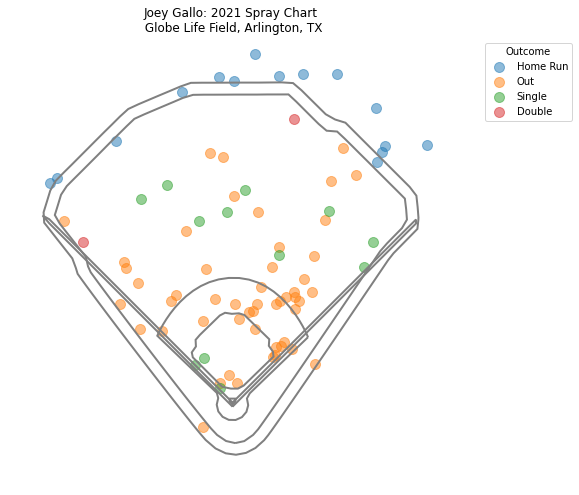

In [6]:
spray_tex = gallo[gallo['home_team'] == 'TEX']
spray_tex = spray_tex.loc[spray_tex['events'] != 'double_play']
spraychart(spray_tex, 'rangers', title = 'Joey Gallo: 2021 Spray Chart \n Globe Life Field, Arlington, TX');

### NYY Spray Chart

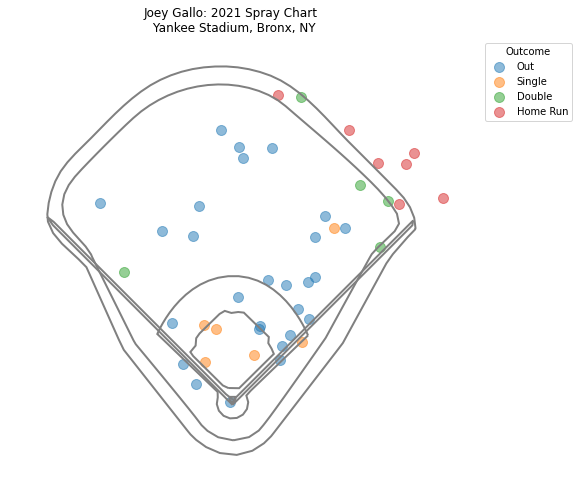

In [7]:
spray_nyy = gallo[gallo['home_team'] == 'NYY']
spraychart(spray_nyy, 'yankees', title = 'Joey Gallo: 2021 Spray Chart \n Yankee Stadium, Bronx, NY');

# Batted Ball Profiles

### Batted Ball Profile - LA

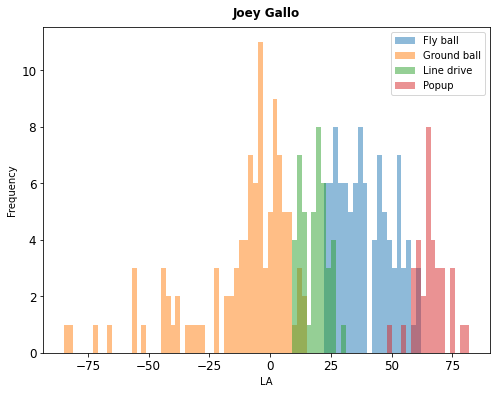

In [8]:
plt.figure(figsize = (8, 6))

plot_bb_profile(gallo, parameter = 'launch_angle')
plt.xlabel('LA'), plt.ylabel('Frequency'), plt.legend()
plt.title('Joey Gallo', fontdict = font_title, pad = 15);

### Batted Ball Profile - EV

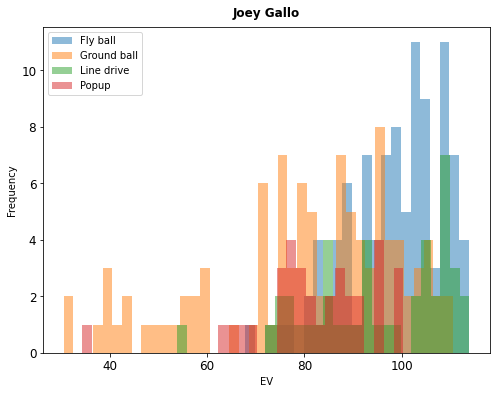

In [9]:
plt.figure(figsize = (8, 6))

plot_bb_profile(gallo, parameter = 'launch_speed')
plt.xlabel('EV'), plt.ylabel('Frequency'), plt.legend()
plt.title('Joey Gallo', fontdict = font_title, pad = 15);

### Quality Contact by Launch Angle & Exit Velocity

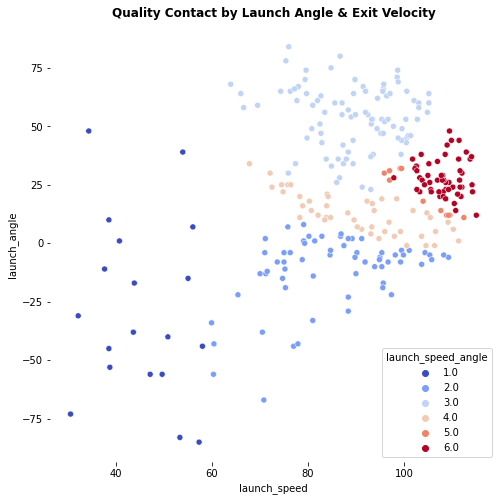

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'launch_speed_angle', 
                palette = 'coolwarm')
plt.title('Quality Contact by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Quality Contact by Launch Angle & Exit Velocity

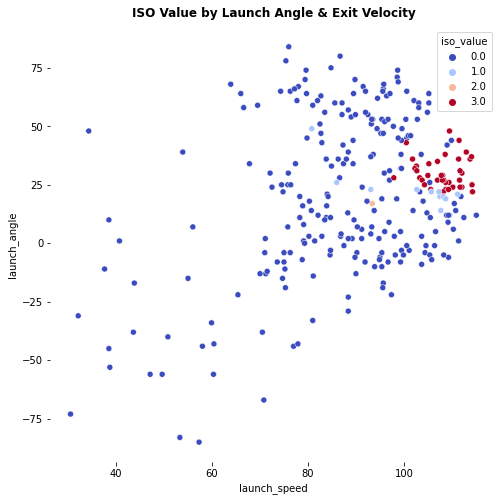

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'iso_value', 
                palette = 'coolwarm')
plt.title('ISO Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### ISO Value by Launch Angle & Exit Velocity

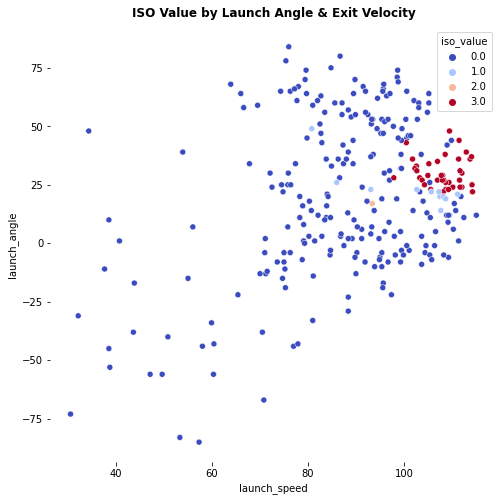

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'iso_value', 
                palette = 'coolwarm')
plt.title('ISO Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### BABIP Value by Launch Angle & Exit Velocity

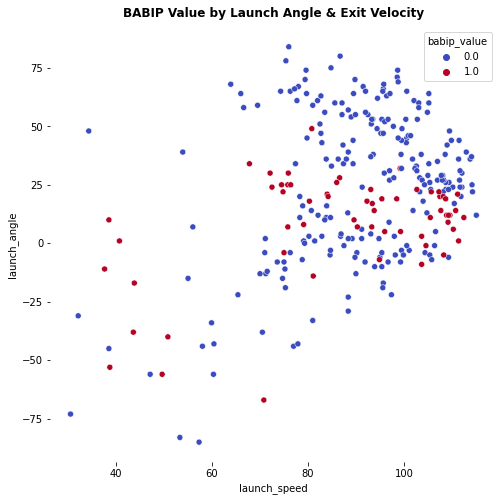

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'babip_value', 
                palette = 'coolwarm')
plt.title('BABIP Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### wOBA Value by Launch Angle & Exit Velocity

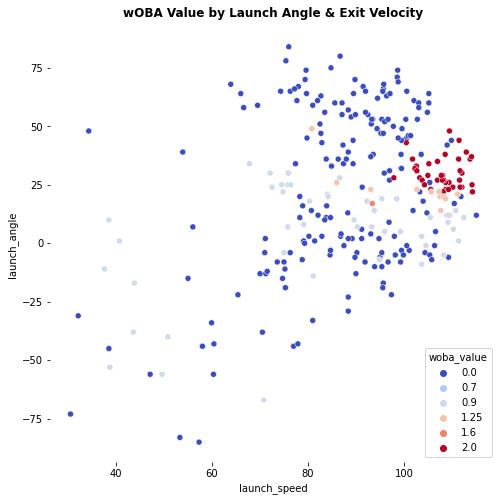

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'woba_value', 
                palette = 'coolwarm')
plt.title('wOBA Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### xwOBA Value by Launch Angle & Exit Velocity

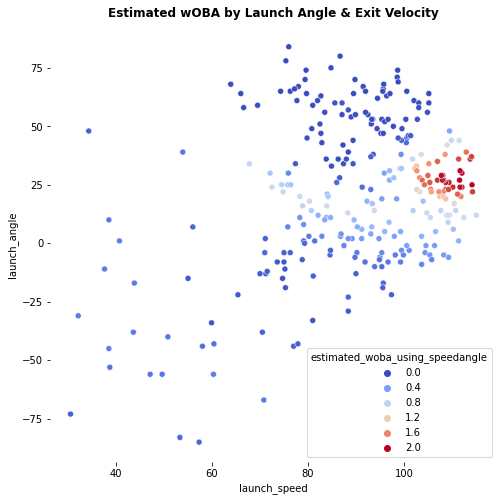

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_woba_using_speedangle', 
                palette = 'coolwarm')
plt.title('Estimated wOBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

###  xBA by Launch Angle & Exit Velocity

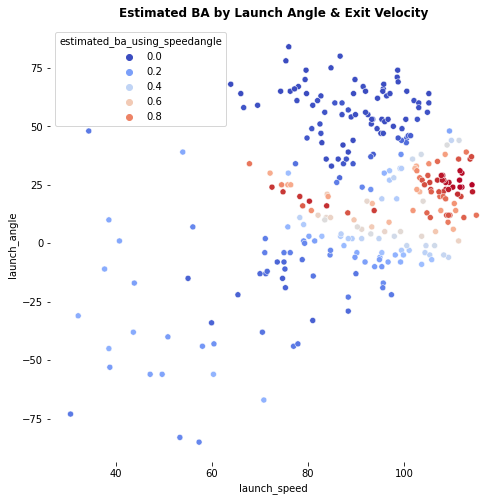

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_ba_using_speedangle', 
                palette = 'coolwarm')
plt.title('Estimated BA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Home Runs by Launch Angle & Exit Velocity

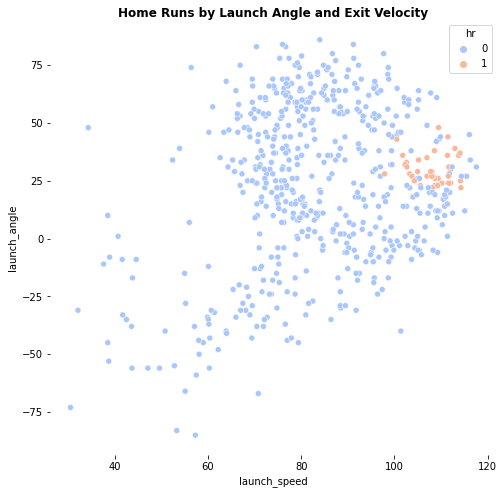

In [17]:
gallo['hr'] = [1 if x == 'home_run' else 0 for x in gallo['events']]
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine(fig, left=True, bottom=True)
sns.scatterplot(data = gallo, x = 'launch_speed', y = 'launch_angle', hue = 'hr', palette = 'coolwarm')
plt.title('Home Runs by Launch Angle and Exit Velocity', fontdict = font_title);

### xwOBA Against EV

In [18]:
gallo.groupby(pd.cut(gallo.launch_speed, 6)).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(30.413, 45.017]",39.456250,-22.437500,13.875000,119.556000,178.535000,0.203500,0.195100,0.540000,1.0,0.600000,0.000000,1.000000,3.300000,0.812500,0.750000,7.625000,1.0,0.0,0.0,0.437500,0.0,0.0,86.606250,2279.000000,196.250000,-0.129375,1.552500,5.827500,-0.224375,6.019375,86.281250,6.118750,54.377500,-0.037500,0.037500,2.483750,581356.500000,663993.000000,615767.666667,1.187500,5.812500,597336.812500,0.966316,-126.038046,-3.204766,-1.259014,26.368771,-25.744384,3.58,1.68,86.606250,2279.000000,196.250000,-0.129375,1.552500,5.827500,-0.224375,6.019375,86.281250,6.118750,54.377500,-0.037500,0.037500,2.483750,608336.0,604040.687500,633306.062500,45.375000,2.562500,2.062500,2.500000,2.562500,2.125000,-0.000375,0.005687,2021.0,0.000000
"(45.017, 59.533]",54.700000,-31.444444,22.555556,126.927778,177.736667,0.167778,0.152889,0.200000,1.0,0.222222,0.000000,1.000000,3.222222,1.388889,0.944444,7.500000,1.0,0.0,0.0,0.055556,0.0,0.0,88.716667,2054.111111,195.333333,-0.006667,0.080000,5.786667,0.712778,5.799444,88.555556,6.194444,54.305556,0.068333,-0.068333,2.513333,NaN,636061.750000,576672.000000,1.000000,5.277778,583224.277778,-1.767160,-129.037247,-3.031936,0.607393,26.851009,-25.598416,3.58,1.68,88.716667,2054.111111,195.333333,-0.006667,0.080000,5.786667,0.712778,5.799444,88.555556,6.194444,54.305556,0.068333,-0.068333,2.513333,608336.0,622925.000000,633428.166667,42.500000,3.444444,2.111111,3.166667,3.166667,2.111111,0.005389,-0.114556,2021.0,0.000000
"(59.533, 74.05]",68.937500,17.008929,119.687500,125.182105,151.514211,0.206263,0.196632,0.189474,1.0,0.210526,0.000000,2.526316,5.000000,1.339286,1.089286,6.991071,1.0,0.0,0.0,0.151786,0.0,0.0,87.606250,2142.625000,184.687500,-0.132232,1.586786,6.025714,-0.629821,5.859196,87.470536,6.226786,54.273929,0.092054,-0.092054,2.417232,612885.000000,612319.619048,626014.000000,0.919643,4.696429,597844.026786,1.638473,-127.451619,-3.234466,-1.808692,26.460220,-25.444923,3.58,1.68,87.606250,2142.625000,184.687500,-0.132232,1.586786,6.025714,-0.629821,5.859196,87.470536,6.226786,54.273929,0.092054,-0.092054,2.417232,608336.0,591544.285714,633500.928571,35.723214,3.535714,1.919643,2.125000,2.125000,1.919643,0.000348,-0.055348,2021.0,0.000000
"(74.05, 88.567]",80.403902,32.878049,162.082927,129.970380,136.034051,0.225570,0.211848,0.179747,1.0,0.189873,0.025316,2.886076,5.468354,1.126829,0.946341,6.068293,1.0,0.0,0.0,0.204878,0.0,0.0,90.598537,2192.458537,196.034146,-0.322780,3.873366,10.420098,-0.641463,5.854146,90.557561,6.277073,54.223366,0.161268,-0.161268,2.505415,618735.736842,611528.216216,621458.422535,1.004878,4.697561,590337.512195,1.938668,-131.776221,-4.309724,-4.256568,27.980563,-20.655572,3.58,1.68,90.598537,2192.458537,196.034146,-0.322780,3.873366,10.420098,-0.641463,5.854146,90.557561,6.277073,54.223366,0.161268,-0.161268,2.505415,608336.0,602921.956098,633404.278049,35.478049,3.175610,1.887805,1.765854,1.780488,1.892683,0.001098,-0.075127,2021.0,0.000000
"(88.567, 103.083]",95.666667,26.444444,177.592593,135.224255,115.147021

### xwOBA Value of a Hit Against Its Exit Velocity

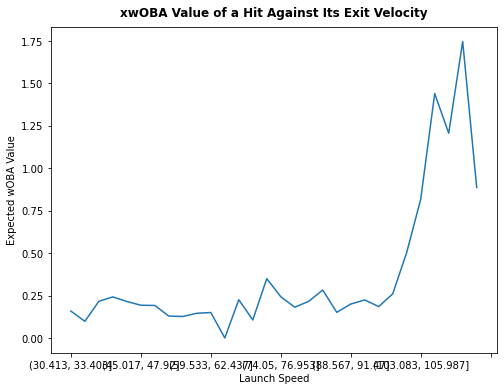

In [19]:
groups = gallo.groupby(pd.cut(gallo.launch_speed, 30))
plt.figure(figsize = (8, 6))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
plt.xlabel('Launch Speed'), plt.ylabel('Expected wOBA Value')
plt.title('xwOBA Value of a Hit Against Its Exit Velocity', fontdict = font_title, pad = 15);

# Pitch Usage & Counts

### Counts Breakdown

In [20]:
counts.groupby(['pitch_count']).mean()

,is_strike,in_zone_take,out_of_zone_chase,zone,launch_speed,launch_angle,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle
pitch_count,,,,,,,,,,,,,,
0-0,0.543089,0.235772,0.027642,8.750820,79.968421,22.694737,151.958763,0.363723,0.422234,0.519000,1.000000,0.360000,0.260000,3.000000
0-1,0.536842,0.084211,0.101754,9.431095,85.656452,23.838710,167.584615,0.315583,0.429167,0.356944,1.000000,0.138889,0.361111,3.305556
0-2,0.401575,0.039370,0.118110,10.404762,78.033333,15.333333,152.400000,0.322571,0.512143,0.097561,1.000000,0.000000,0.146341,3.571429
1-0,0.561151,0.115108,0.057554,9.221014,89.395522,26.716418,208.059701,0.355594,0.535219,0.554688,1.000000,0.187500,0.593750,3.875000
1-1,0.542969,0.093750,0.085938,9.114625,84.146774,23.629032,167.483871,0.289531,0.410375,0.401429,1.000000,0.114286,0.371429,3.281250
1-2,0.495238,0.042857,0.057143,9.733333,84.924528,19.811321,150.452830,0.359750,0.464938,0.228846,0.987179,0.115385,0.192308,3.406250
2-0,0.631148,0.204918,0.008197,7.967213,85.758621,6.068966,153.827586,0.397467,0.551133,0.410000,1.000000,0.133333,0.466667,3.200000
2-1,0.613636,0.079545,0.068182,8.826590,83.987500,20.803571,166.754386,0.307217,0.399826,0.285417,0.958333,0.208333,0.166667,3.391304
2-2,0.614035,0.057018,0.118421,9.563877,85.011475,26.459016,184.950820,0.357600,0.475467,0.148529,1.000000,0.088235,0.117647,3.633333


### Pitch Usage by Pitcher Handedness

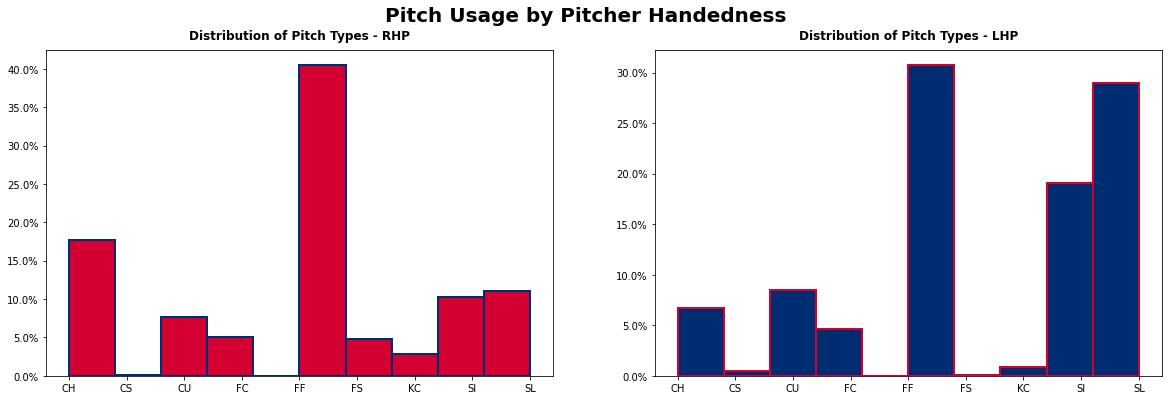

In [21]:
r_gallo.dropna(subset=['pitch_type'], inplace = True)
l_gallo.dropna(subset=['pitch_type'], inplace = True)
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')
dist_r = r_gallo.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)
dist_l = l_gallo.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

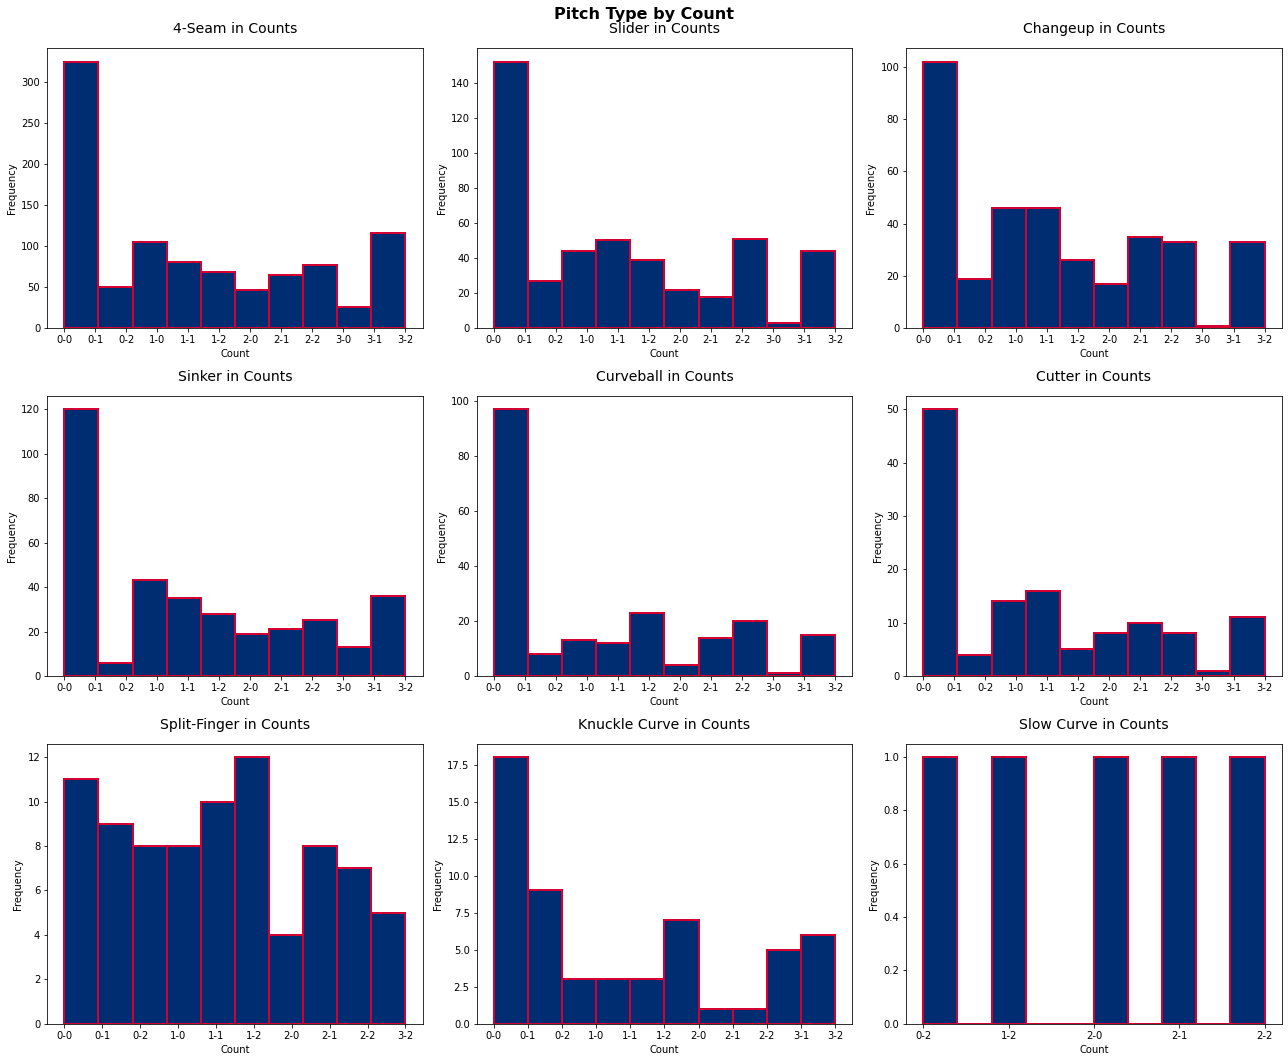

In [22]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count'), plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider in Counts', fontsize = 14, pad = 15)
axs[0][2].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][2].set_title('Changeup in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinker in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveball in Counts', fontsize = 14, pad = 15)
axs[1][2].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][2].set_title('Cutter in Counts', fontsize = 14, pad = 15)
axs[2][0].hist(fs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Split-Finger in Counts', fontsize = 14, pad = 15)
axs[2][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Knuckle Curve in Counts', fontsize = 14, pad = 15)
axs[2][2].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][2].set_title('Slow Curve in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Heatmaps

### In-Zone Take Heatmaps - All Pitches

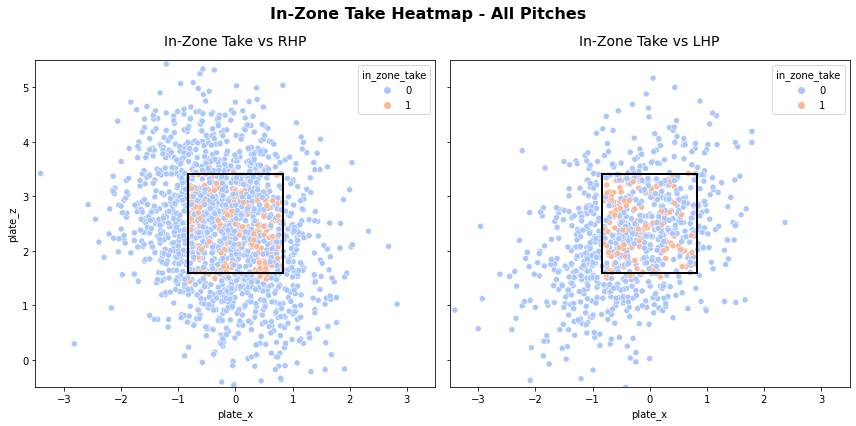

In [23]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap - All Pitches', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data=r_gallo,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data=l_gallo,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('In-Zone Take vs LHP', fontsize = 14, pad = 15)
plt.tight_layout();

### Out-of-Zone Chase Heatmaps - All Pitches

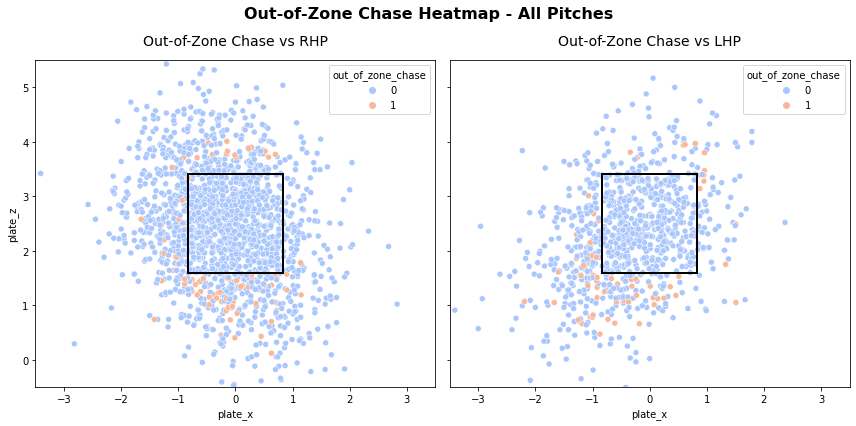

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
fig.suptitle('Out-of-Zone Chase Heatmap - All Pitches', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data=r_gallo,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Out-of-Zone Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data=l_gallo,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Out-of-Zone Chase vs LHP', fontsize = 14, pad = 15)
plt.tight_layout();

### In-Zone Take Heatmaps - by Pitch Type vs. RHP

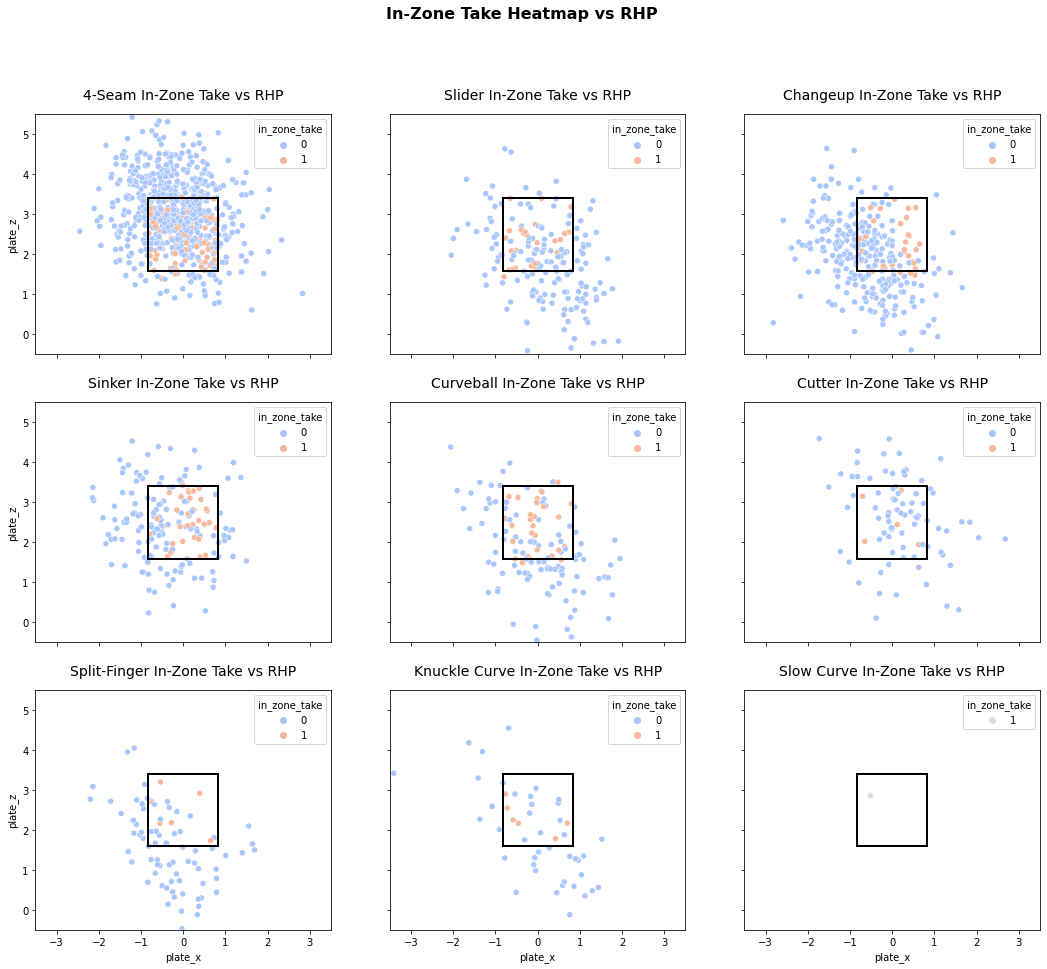

In [25]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_cs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve In-Zone Take vs RHP', fontsize = 14, pad = 15);

### In-Zone Take Heatmaps - by Pitch Type vs. LHP

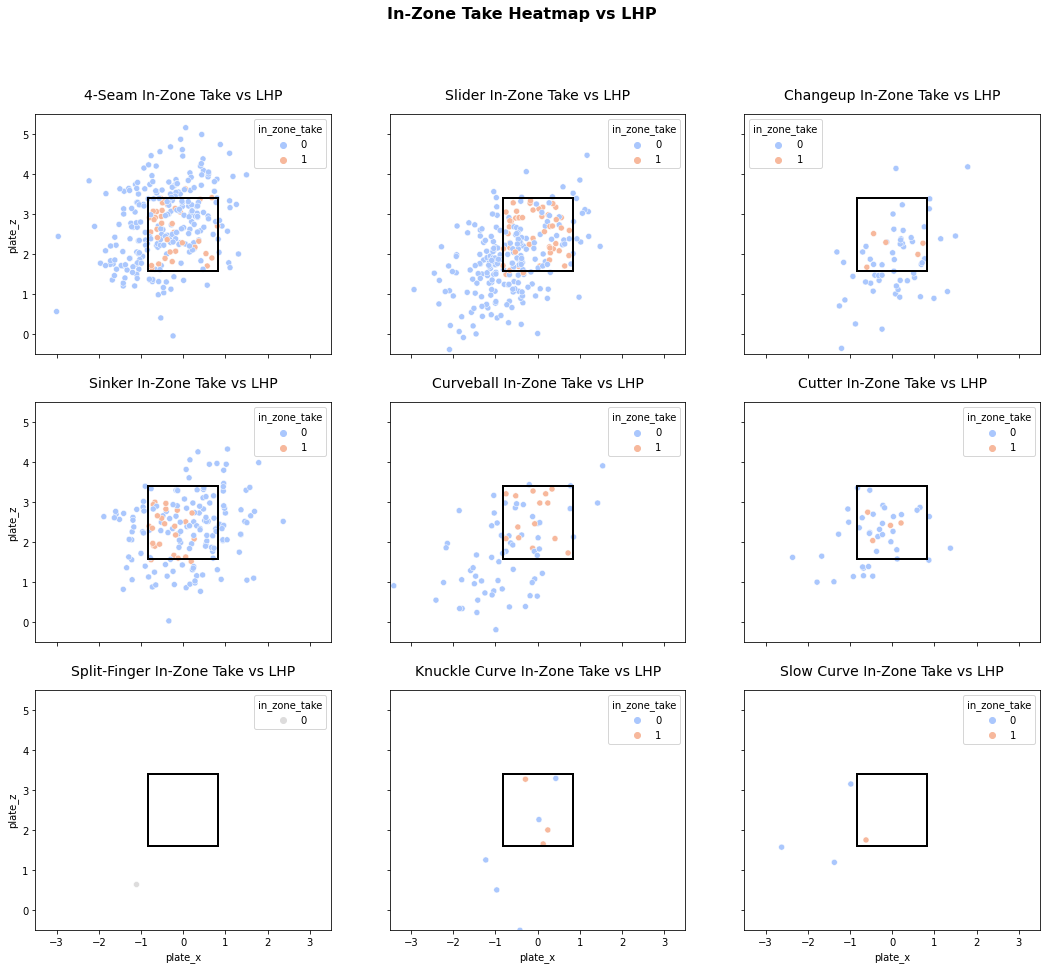

In [26]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_cs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve In-Zone Take vs LHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP

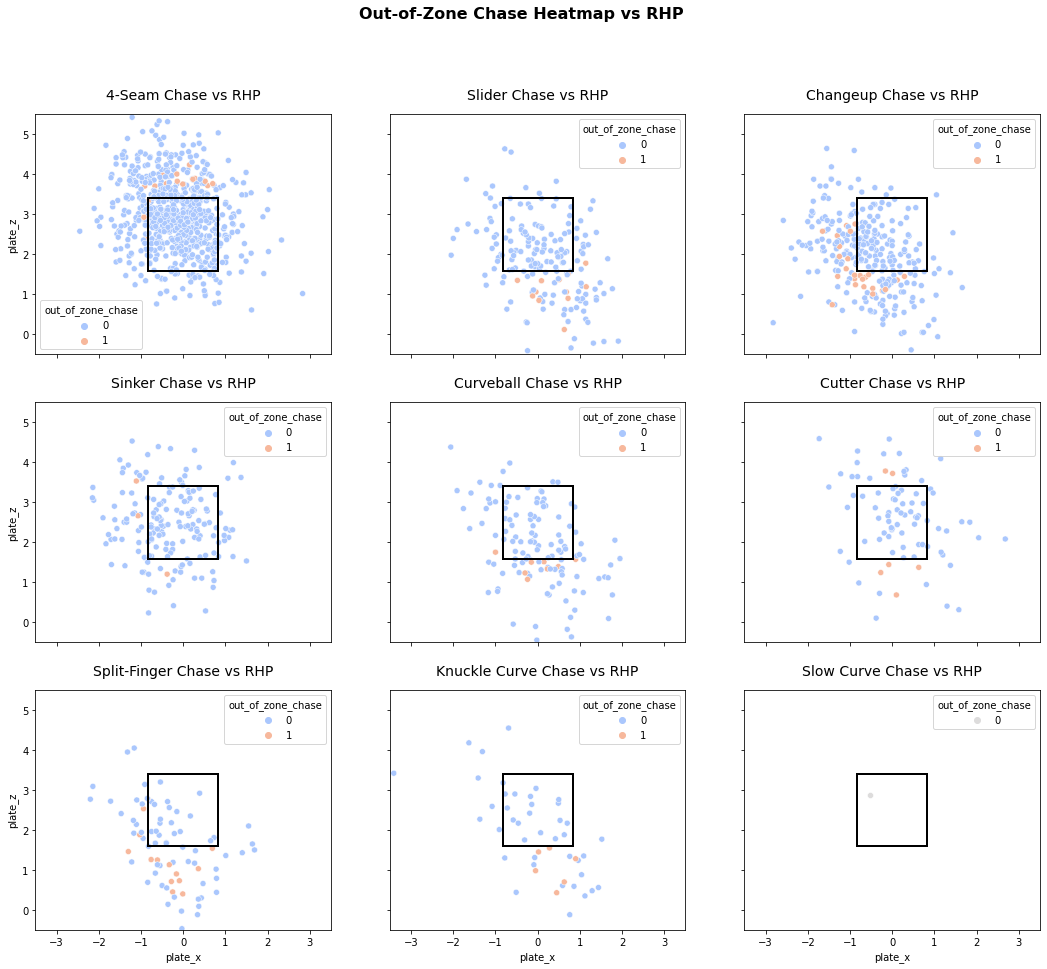

In [27]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('Out-of-Zone Chase Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_cs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve Chase vs RHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP

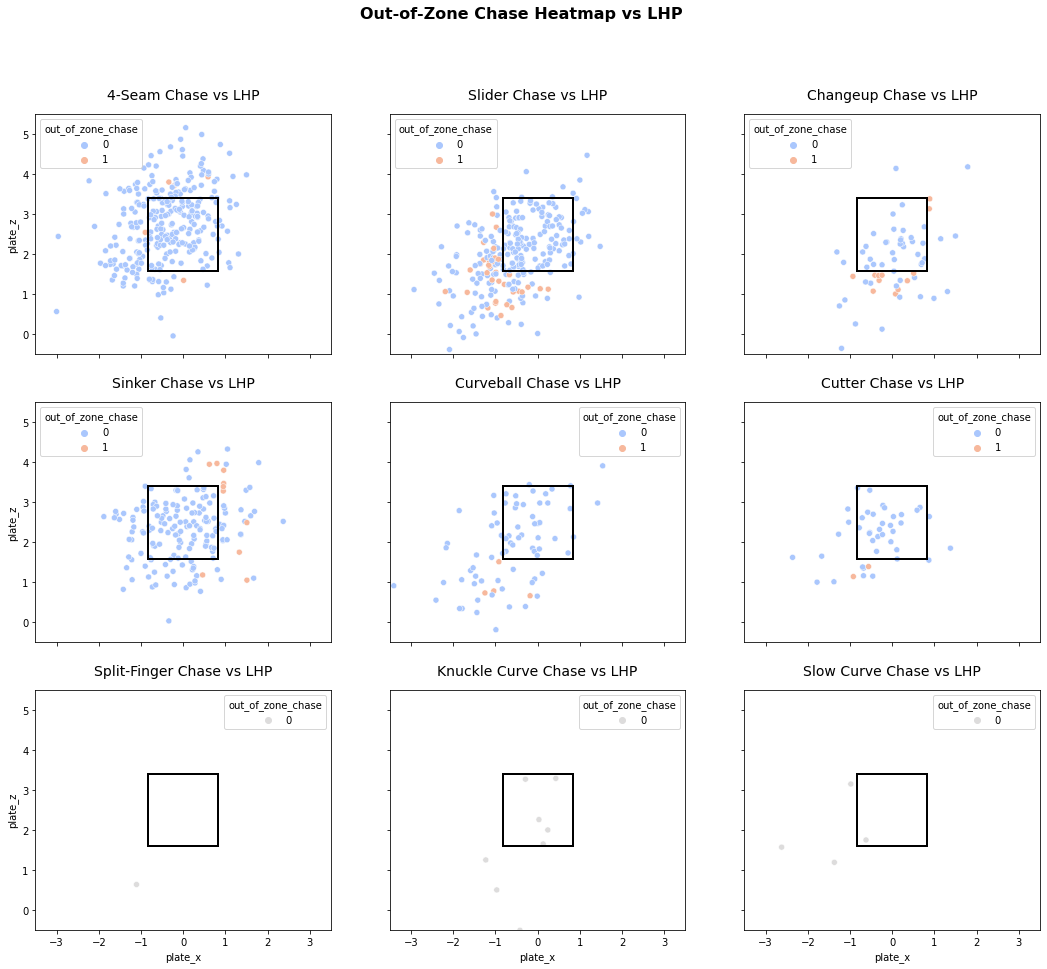

In [28]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('Out-of-Zone Chase Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_cs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve Chase vs LHP', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

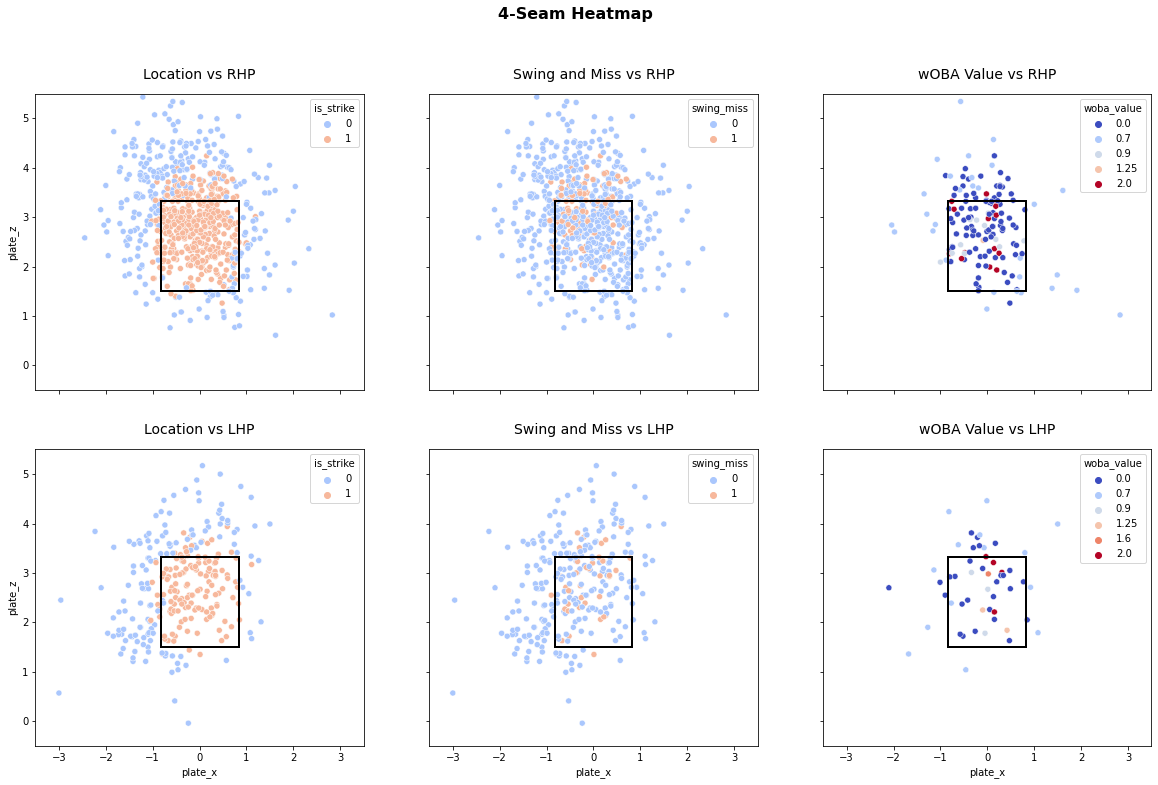

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

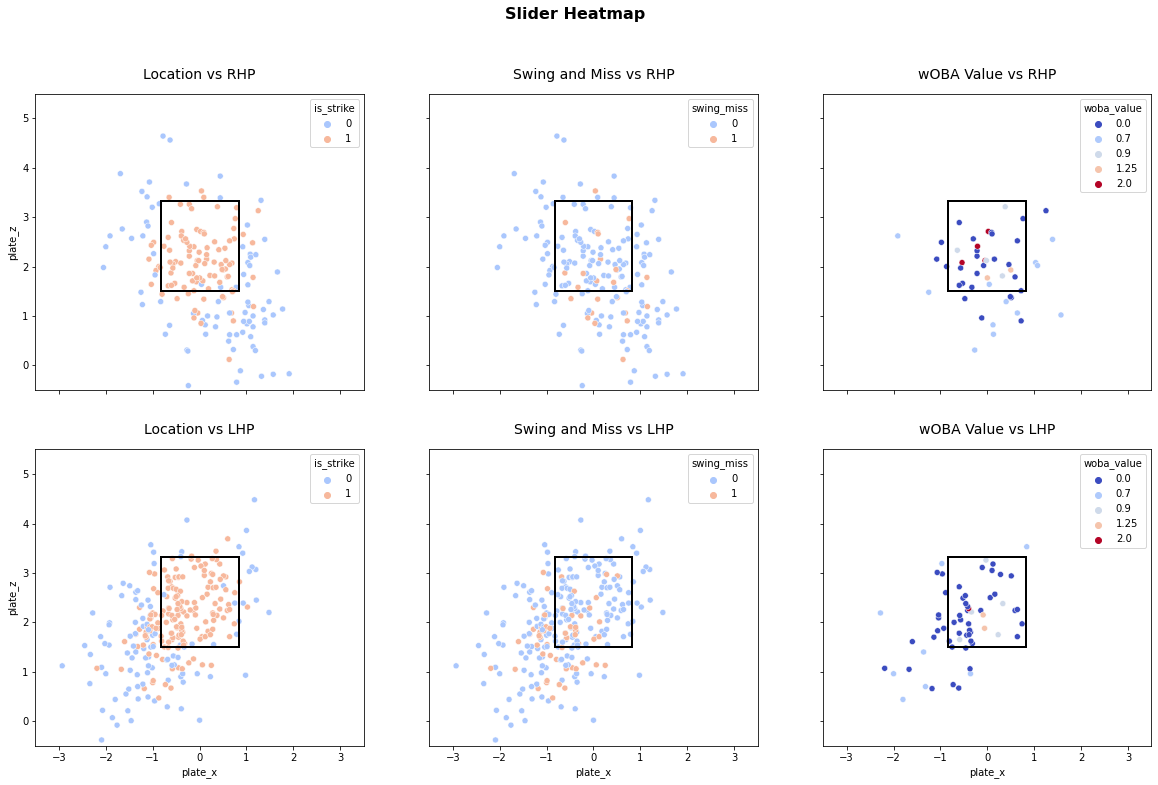

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

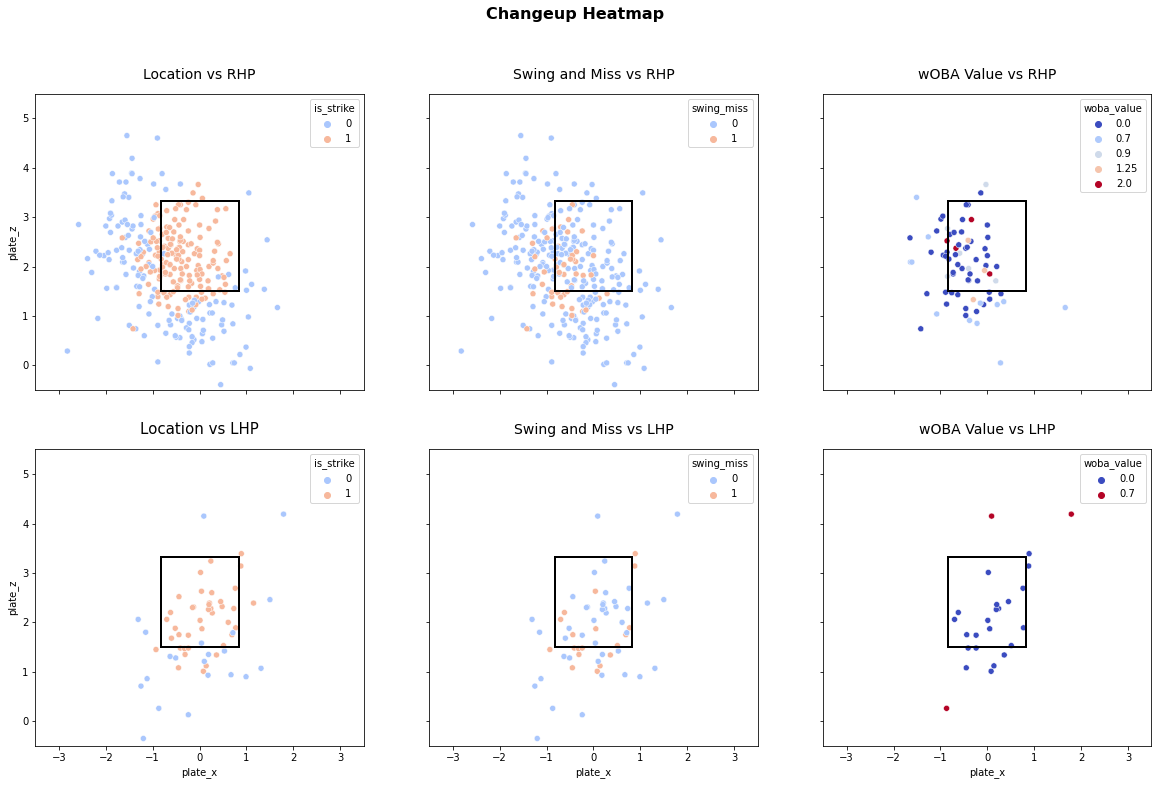

In [31]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

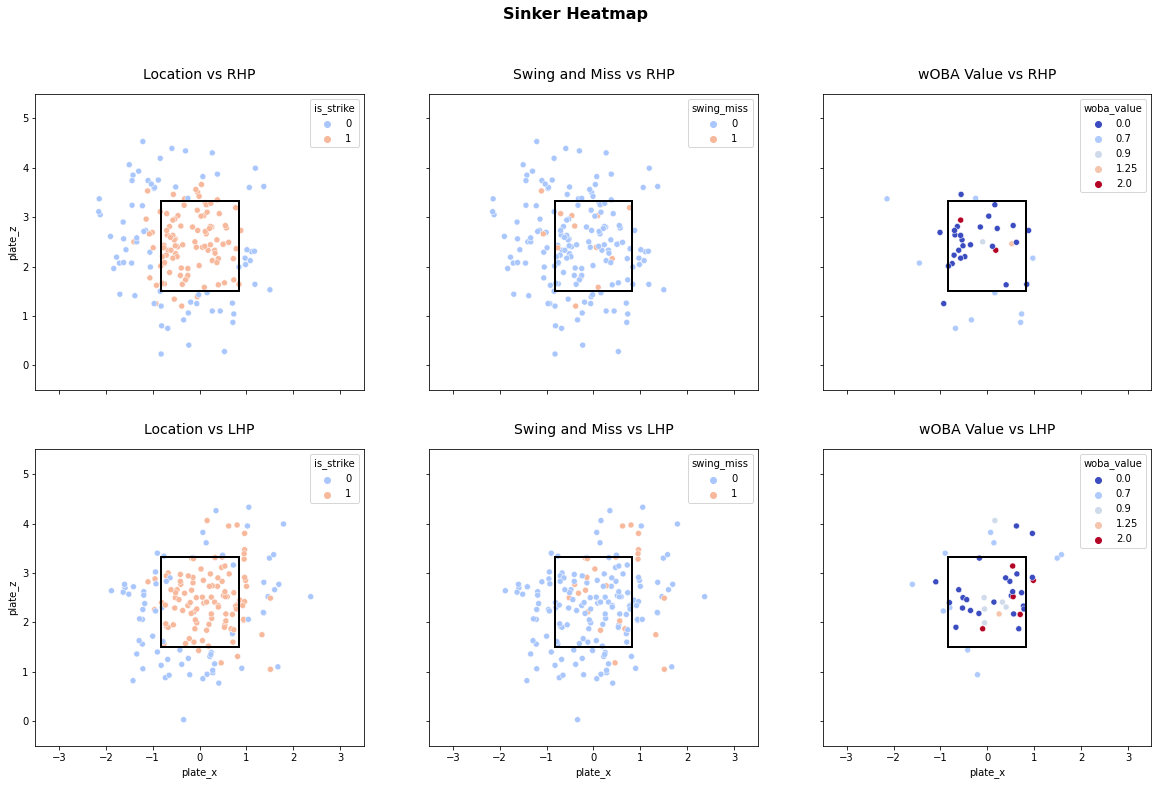

In [32]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

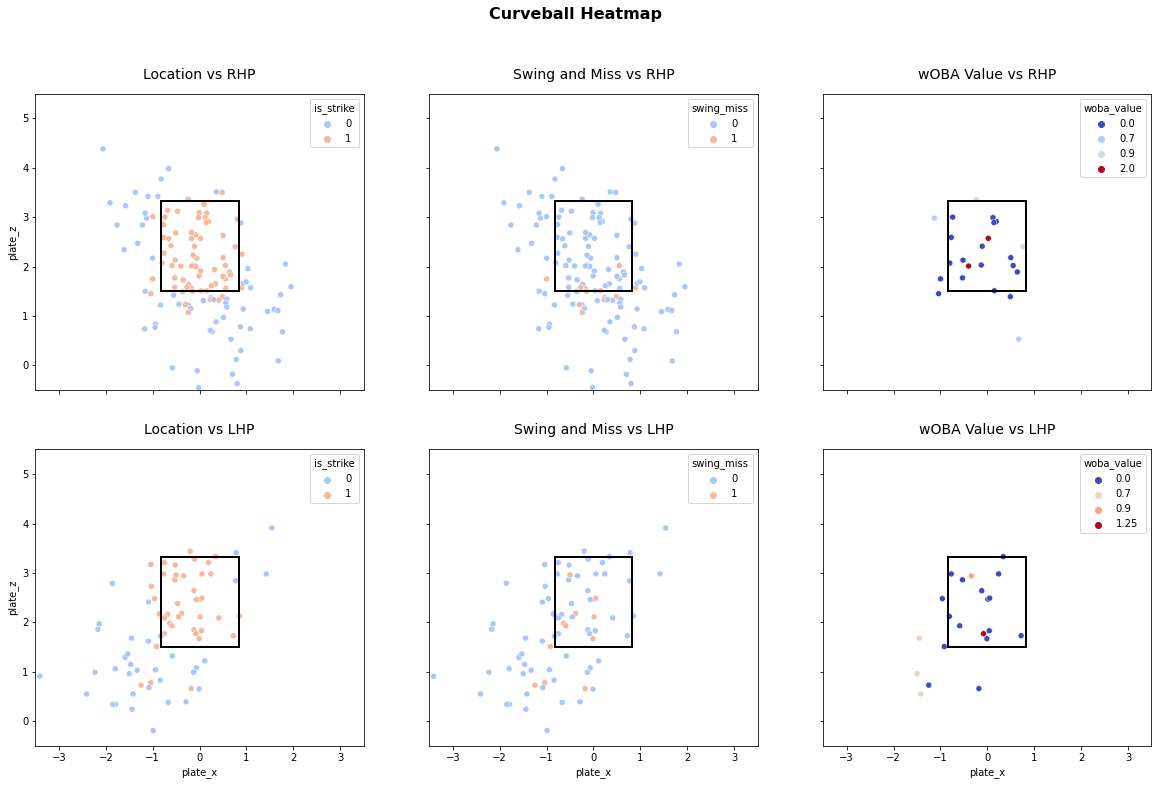

In [33]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

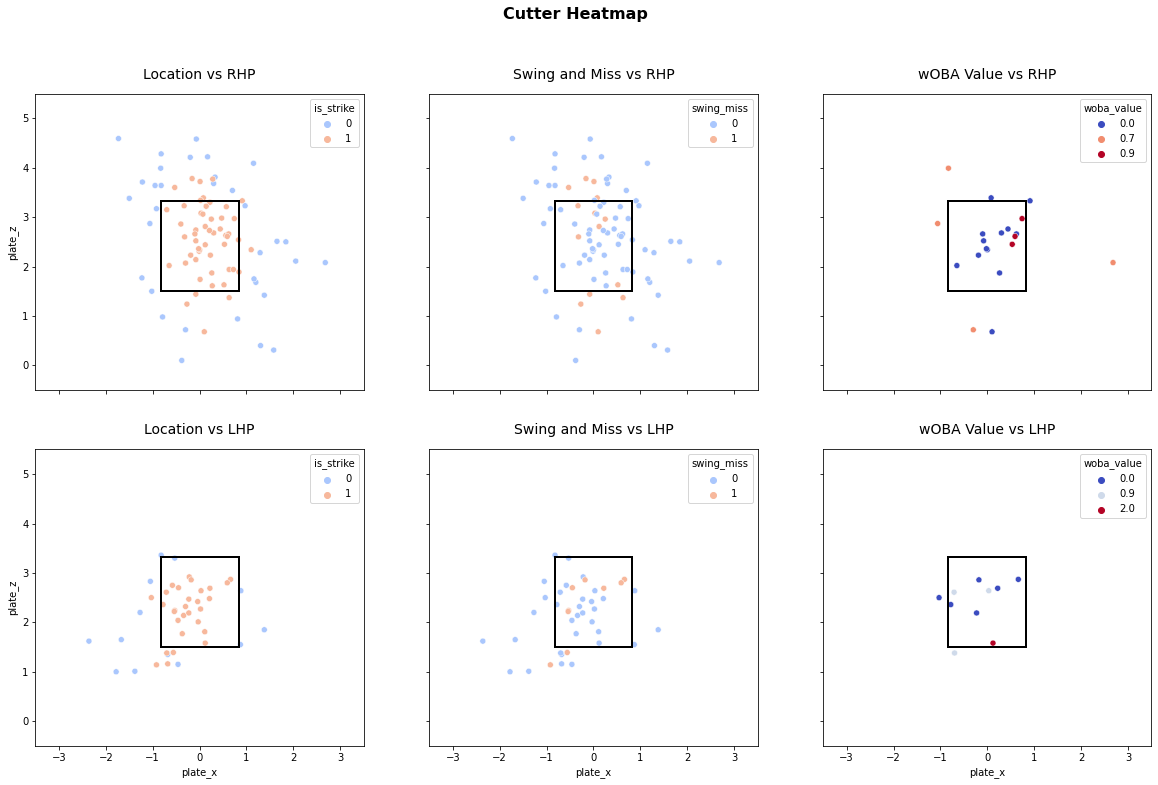

In [34]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

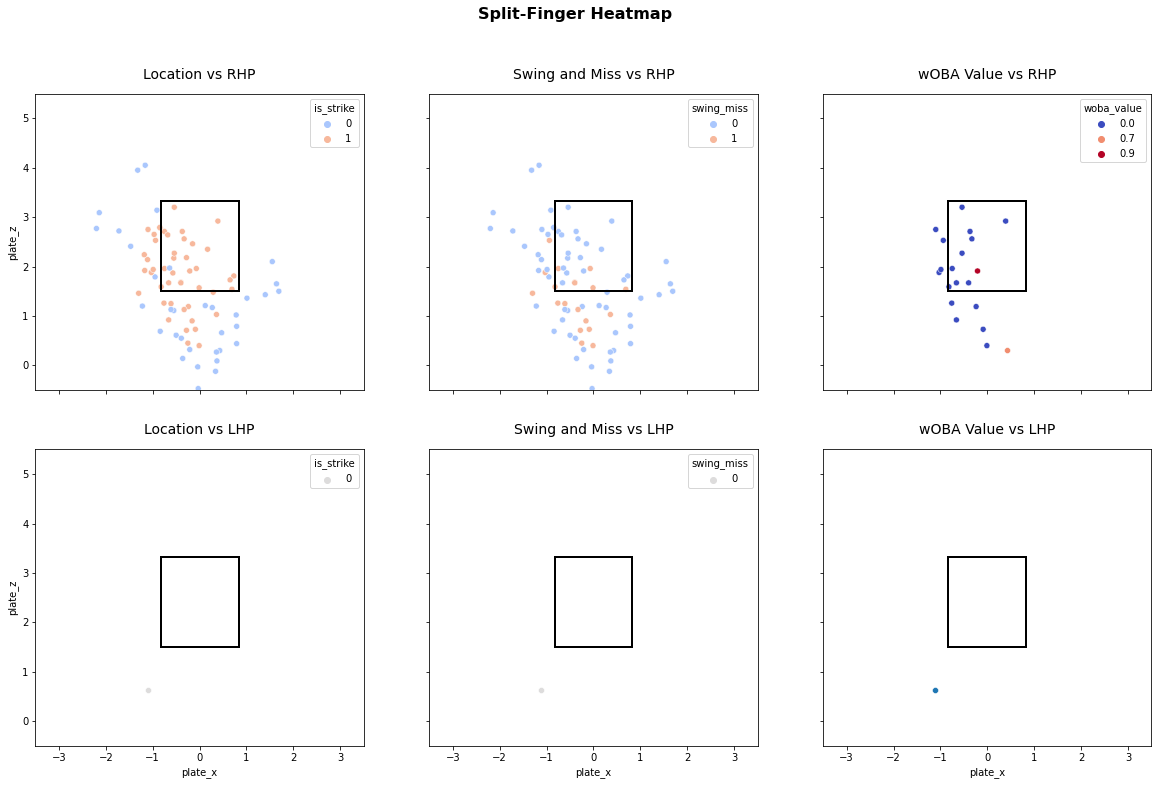

In [35]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

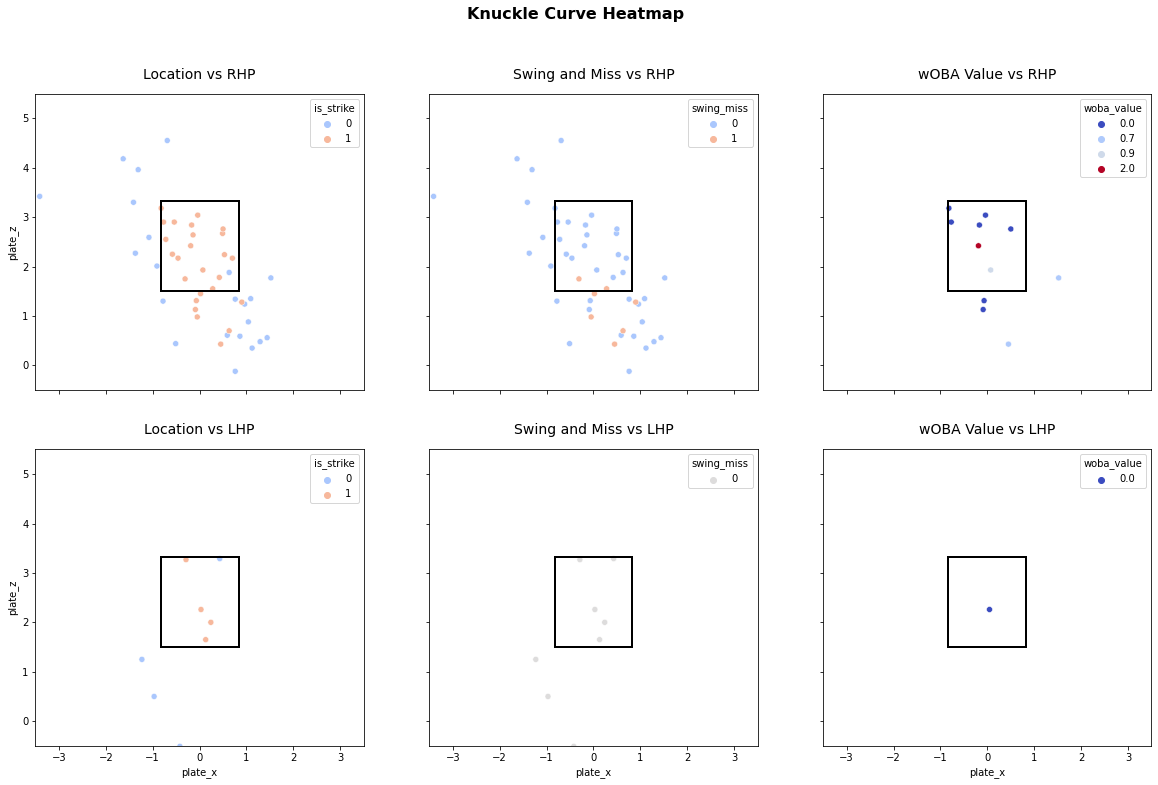

In [36]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

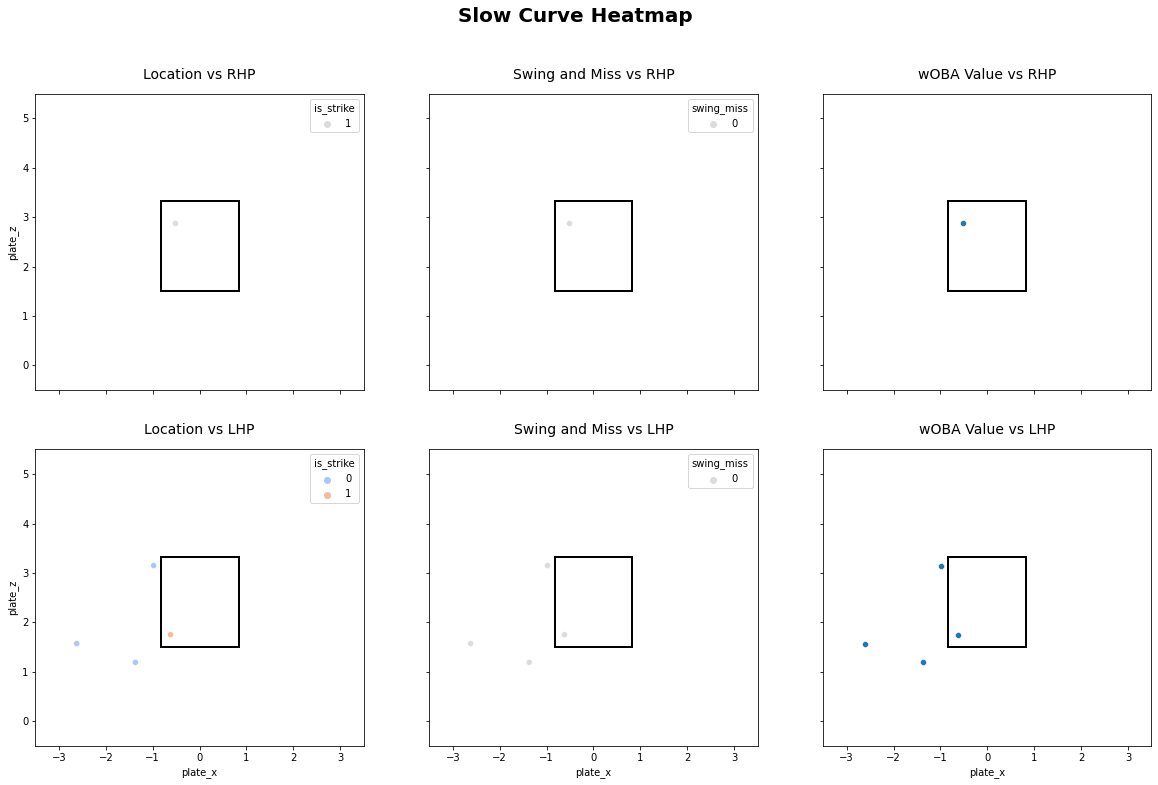

In [37]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);